<h1 align="center"> Sampling </h1>

In [57]:
import numpy as np
import pandas as pd
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt

In [64]:
p = 0.01
sim_times = int(1e4)

### Sample Size = 100

In [65]:
sample_size = int(1e2)
df_samples = pd.DataFrame(np.random.rand(sim_times, sample_size)).apply(lambda x: x > 1 - p)
df_hits = df_samples.sum(axis=1)
df_means = df_hits.apply(lambda x: x / sample_size)

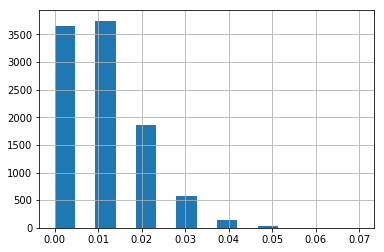

In [66]:
df_means.hist(bins=15)

In [67]:
prob_mid_1e2 = df_hits.apply(lambda x: x == sample_size * p).sum() / sim_times
prob_right_1e2 = df_hits.apply(lambda x: x > sample_size * p).sum() / sim_times
prob_left_1e2 = df_hits.apply(lambda x: x < sample_size * p).sum() / sim_times
print(f"P(hit ratio > {p:.0%}) = {prob_right_1e2:.1%}")
print(f"P(hit ratio < {p:.0%}) = {prob_left_1e2:.1%}")
print(f"P(hit ratio = {p:.0%}) = {prob_mid_1e2:.1%}")

P(hit ratio > 1%) = 26.1%
P(hit ratio < 1%) = 36.4%
P(hit ratio = 1%) = 37.5%


### Sample Size = 1,000

In [68]:
sample_size = int(1e3)
df_samples = pd.DataFrame(np.random.rand(sim_times, sample_size)).apply(lambda x: x > 1 - p)
df_hits = df_samples.sum(axis=1)
df_means = df_hits.apply(lambda x: x / sample_size)

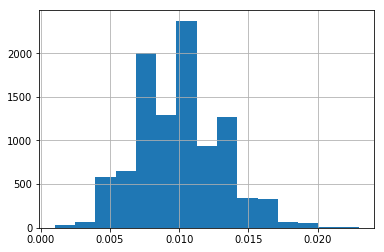

In [69]:
df_means.hist(bins=15)

In [8]:
prob_mid_1e3 = df_hits.apply(lambda x: x == sample_size * p).sum() / sim_times
prob_right_1e3 = df_hits.apply(lambda x: x > sample_size * p).sum() / sim_times
prob_left_1e3 = df_hits.apply(lambda x: x < sample_size * p).sum() / sim_times
print(f"P(hit ratio > {p:.0%}) = {prob_right_1e3:.1%}")
print(f"P(hit ratio < {p:.0%}) = {prob_left_1e3:.1%}")
print(f"P(hit ratio = {p:.0%}) = {prob_mid_1e3:.1%}")

P(hit ratio > 1%) = 42.6%
P(hit ratio < 1%) = 44.7%
P(hit ratio = 1%) = 12.7%


### Sample Size = 10,000

In [9]:
sample_size = int(1e4)
df_samples = pd.DataFrame(np.random.rand(sim_times, sample_size)).apply(lambda x: x > 1 - p)
df_hits = df_samples.sum(axis=1)
df_means = df_hits.apply(lambda x: x / sample_size)

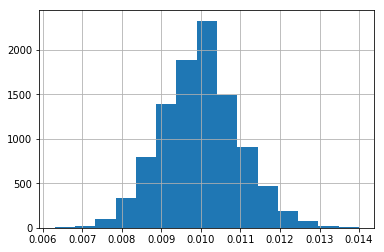

In [10]:
df_means.hist(bins=15)

In [11]:
prob_mid_1e4 = df_hits.apply(lambda x: x == sample_size * p).sum() / sim_times
prob_right_1e4 = df_hits.apply(lambda x: x > sample_size * p).sum() / sim_times
prob_left_1e4 = df_hits.apply(lambda x: x < sample_size * p).sum() / sim_times
print(f"P(hit ratio > {p:.0%}) = {prob_right_1e4:.1%}")
print(f"P(hit ratio < {p:.0%}) = {prob_left_1e4:.1%}")
print(f"P(hit ratio = {p:.0%}) = {prob_mid_1e4:.1%}")

P(hit ratio > 1%) = 46.8%
P(hit ratio < 1%) = 49.1%
P(hit ratio = 1%) = 4.0%


### Sample Size = 100,000

In [12]:
sample_size = int(1e5)
df_samples = pd.DataFrame(np.random.rand(sim_times, sample_size)).apply(lambda x: x > 1 - p)
df_hits = df_samples.sum(axis=1)
df_means = df_hits.apply(lambda x: x / sample_size)

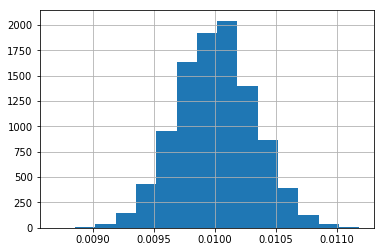

In [13]:
df_means.hist(bins=15)

In [14]:
prob_mid_1e5 = df_hits.apply(lambda x: x == sample_size * p).sum() / sim_times
prob_right_1e5 = df_hits.apply(lambda x: x > sample_size * p).sum() / sim_times
prob_left_1e5 = df_hits.apply(lambda x: x < sample_size * p).sum() / sim_times
print(f"P(hit ratio > {p:.0%}) = {prob_right_1e5:.1%}")
print(f"P(hit ratio < {p:.0%}) = {prob_left_1e5:.1%}")
print(f"P(hit ratio = {p:.0%}) = {prob_mid_1e5:.1%}")

P(hit ratio > 1%) = 50.0%
P(hit ratio < 1%) = 48.9%
P(hit ratio = 1%) = 1.0%


### Convergence of Sample Mean

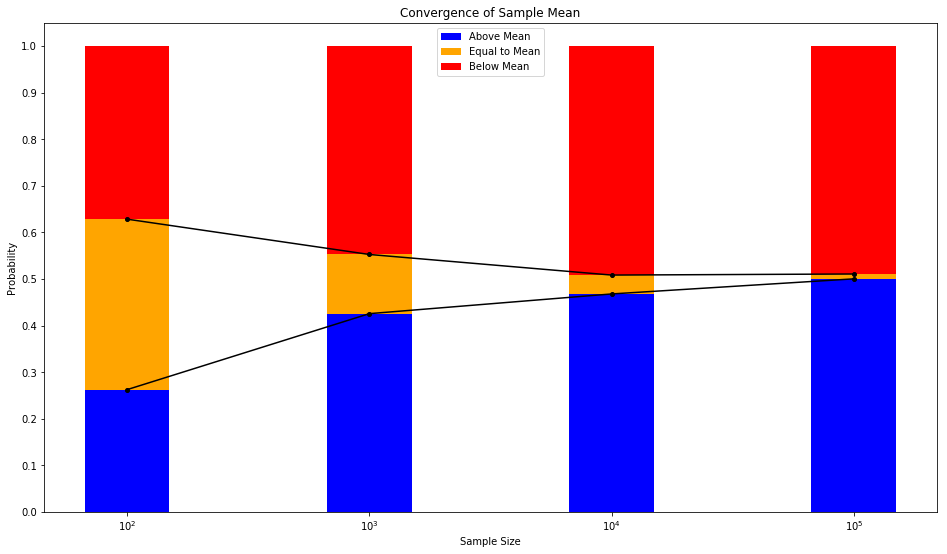

In [15]:
prob_right = [prob_right_1e2, prob_right_1e3, prob_right_1e4, prob_right_1e5]
prob_mid = [prob_mid_1e2, prob_mid_1e3, prob_mid_1e4, prob_mid_1e5]
prob_left = [prob_left_1e2, prob_left_1e3, prob_left_1e4, prob_left_1e5]
prob_midright = np.add(prob_right, prob_mid).tolist()

plt.figure(figsize=(16, 9))

p1 = plt.bar(np.arange(4), prob_right, color='blue', edgecolor=None, width=0.35)
p2 = plt.bar(np.arange(4), prob_mid, bottom=prob_right, color='orange', edgecolor=None, width=0.35)
p3 = plt.bar(np.arange(4), prob_left, bottom=prob_midright, color='red', edgecolor=None, width=0.35)

plt.ylabel('Probability')
plt.xlabel('Sample Size')
plt.title('Convergence of Sample Mean')
plt.xticks(np.arange(4), (r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend((p1[0], p2[0], p3[0]), ('Above Mean', 'Equal to Mean', 'Below Mean'), loc='upper center')

plt.plot(np.arange(4), prob_right, 'k-o', markersize=4)
plt.plot(np.arange(4), prob_midright, 'k-o', markersize=4)

plt.show()